In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed

In [131]:
files = glob("highres_oldparams/M_1.00e+08_mdot_0.10/line*.csv")

In [132]:
lines = []

In [133]:
for file in files:
    data = pd.read_csv(file)
    lines.append(data)


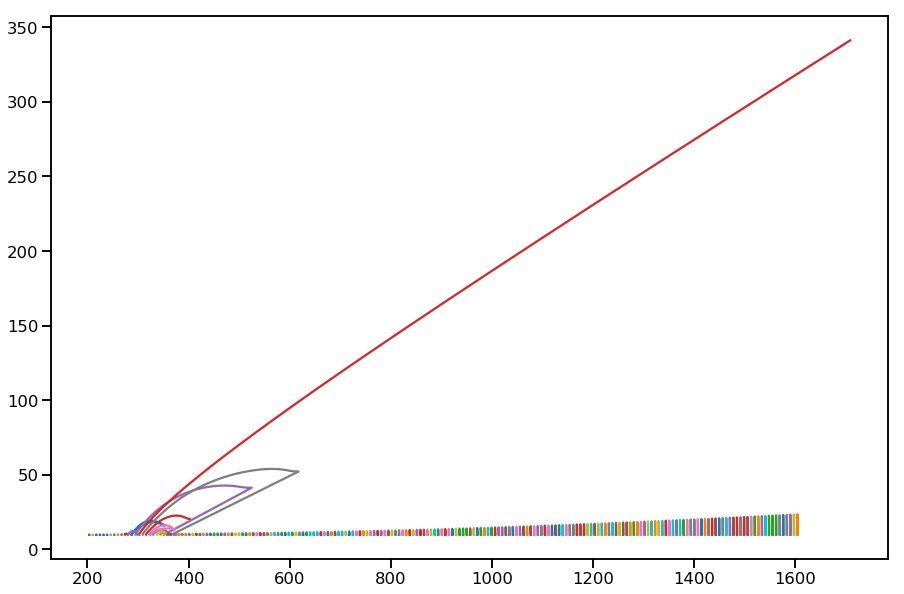

In [147]:
plt.figure(figsize = (15,10))
lines_escaped = []
for line in lines:
    plt.plot(line.R, line.Z)

    if(line.Z.iloc[-1] > 50):
        lines_escaped.append(line)

(0, 3000)

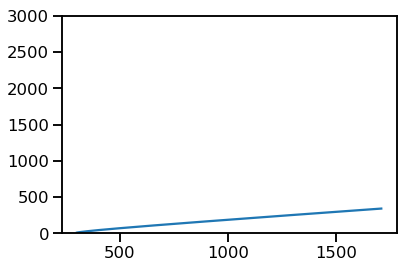

In [137]:
for line in lines_escaped:
    plt.plot(line.R, line.Z)
plt.ylim(0,3000)

In [138]:
v_T_list = []
angles = []
rho_list = []
for line in lines_escaped:
    angle = np.arctan(line.Z.iloc[-1] / line.R.iloc[-1])
    v_T = line.V_T.iloc[-1]
    rho = line.rho.iloc[-1]
    angles.append(angle)
    v_T_list.append(v_T)
    rho_list.append(rho)
angles = np.array(angles)
v_T_list = np.array(v_T_list)
rho_list = np.array(rho_list)

In [139]:
angles_sort_idx = np.argsort(angles)
angles = np.pi/2. - angles[angles_sort_idx]
v_T_list = v_T_list[angles_sort_idx]
rho_list = rho_list[angles_sort_idx]

(30, 90)

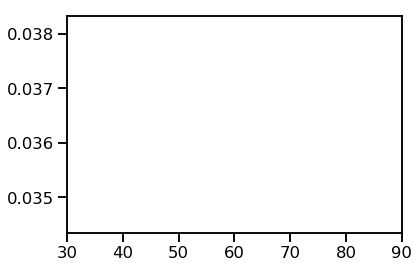

In [140]:
plt.plot(angles * 180 / np.pi, v_T_list)
plt.xlim(30,90)

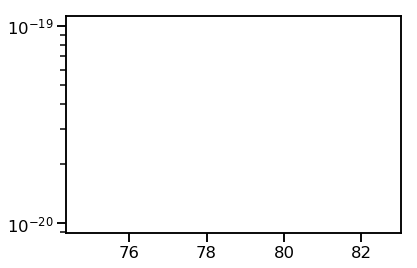

In [141]:
plt.semilogy(angles * 180 / np.pi, rho_list * constants.m_p )

1.9811302989916375
creating figure.
xray fraction: 0.129692 
 uv_fraction: 0.843630 

r_in: 28.533860 
 r_out: 772.669938
1.9811302989916375
creating figure.
xray fraction: 0.129692 
 uv_fraction: 0.843630 



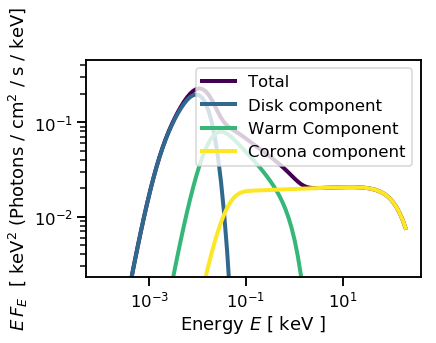

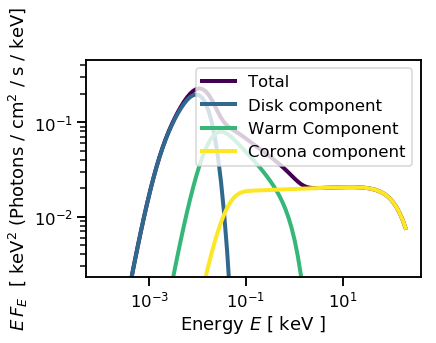

In [142]:
from qwind import wind
test = wind.Qwind(M=1e8, mdot = 0.1)

In [143]:
def surface_density(M, mdot, R):
    Rg = test.Rg
    Rs = 2 * Rg
    R = R * Rg
    rad_char = 18 * M**(2./21.) * (mdot / 0.06)**(16./21.) * Rs
    if (R <= rad_char):
        value = 5.24e-4 * M**(-1.) * (mdot/0.06)**(-2.) * (R / Rs)**(3./2.)
        return value
    else:
        value = 4.66 * M**(-7./10.) * (mdot / 0.06)**(2./5.) * (r / Rs)**(-33./20.)
        return value

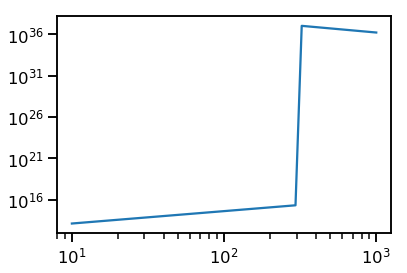

In [144]:
r_range = np.geomspace(10, 1000)
dens_values = []
for r in r_range:
    dens_values.append(surface_density(1e8, 0.1, r) / constants.m_p)
plt.loglog(r_range, dens_values)

In [145]:
1e-20/ constants.m_p

5978.637498383391